## Insight Admin Screens

This document demonstrates the basics of the user interaction with the Insight Administration Panel

https://docs.google.com/drawings/d/1xAepcmS36AIdqzVDXA8k3Bq9rl-LW2eO9EYVfxE-13A/edit

### Landing Page

This is the Login page of Insight. 

### Community

Display the current statistics of the OM Userbase (OM Dashboard)

In [1]:
%matplotlib inline
import requests
import json

insightIP = 'http://178.62.229.16'
insightPort = '8484'
insightVersion = 'v1.1'
insightSetting = insightIP + ':' + insightPort + '/api/' + insightVersion 
api_key = "" #needs to be filled

page = 1
users = []
while(True):
    request = '/omn_crawler/get_om_user_profiles?' + 'page=' + str(page) + '&' + 'api_key=' + api_key
    # send a request
    res = requests.get(insightSetting + request)
    
    if len(res.json()['users']) == 0:
        break
    
    users.extend(res.json()['users'])
    page += 1

In [2]:
twitter_user_counter = 0

for u in users:
    if 'twitter_profile' in u:
        twitter_user_counter += 1

print("Total Number of Capsule CRM users: " + str(len(users)))
print("Total Number of Twitter Registered Capsule CRM users: " + str(twitter_user_counter))

Total Number of Capsule CRM users: 555
Total Number of Twitter Registered Capsule CRM users: 201


### Demographs

#### Gender

Show the Gender Analysis of Capsule CRM Users based on the number of counts

Retrieve profiles of all Users

In [3]:
import requests
import json

insightIP = 'http://178.62.229.16'
insightPort = '8484'
insightVersion = 'v1.0'
insightSetting = insightIP + ':' + insightPort + '/api/' + insightVersion 
api_key = "" #needs to be filled

page = 1
users = []
while(True):
    request = '/omn_crawler/get_om_user_profiles?' + 'page=' + str(page) + '&' + 'api_key=' + api_key
    # send a request
    res = requests.get(insightSetting + request)
    
    if len(res.json()['users']) == 0:
        break
    
    users.extend(res.json()['users'])
    page += 1

List all genders from profile of Users

In [41]:
all_genders = []

for g in users:
    for index in g['capsule_profile']['fields']:
        if index['definition']['name']== 'Gender':
            all_genders.append(index['value'])

Categorize all Genders

In [42]:
from collections import Counter

count_gender = Counter()

for i in all_genders:
    count_gender[i] += 1

gender_labels = []
gender_size = []

for k in count_gender.keys():
    gender_labels.append(k)
    gender_size.append(count_gender[k])

Plot the Gender Analysis

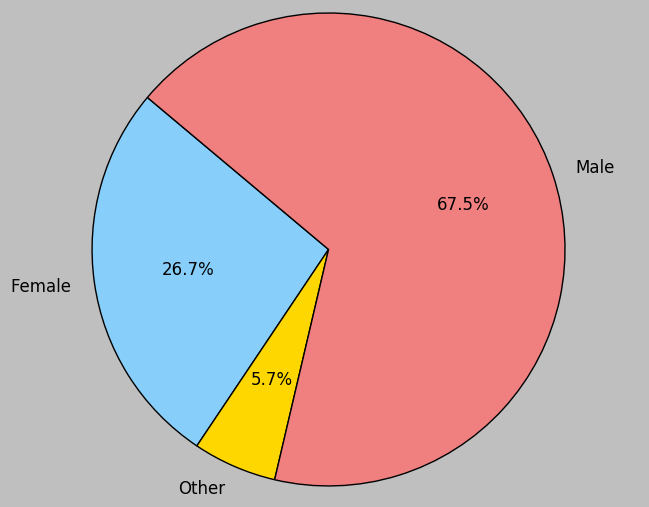

In [44]:
import matplotlib.pyplot as plt

 
labels = gender_labels
sizes = gender_size
colors = ['lightskyblue', 'gold', 'lightcoral']
 
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)
 
plt.axis('equal')
plt.show()

#### Age

Show the Age Analysis of Capsule CRM Users based on the number of counts

Retrieve profiles of all Users

In [12]:
import requests
import json

insightIP = 'http://178.62.229.16'
insightPort = '8484'
insightVersion = 'v1.0'
insightSetting = insightIP + ':' + insightPort + '/api/' + insightVersion 
api_key = "" #needs to be filled

page = 1
users = []
while(True):
    request = '/omn_crawler/get_om_user_profiles?' + 'page=' + str(page) + '&' + 'api_key=' + api_key
    # send a request
    res = requests.get(insightSetting + request)
    
    if len(res.json()['users']) == 0:
        break
    
    users.extend(res.json()['users'])
    page += 1

List all ages from profile of Users

In [45]:
all_ages = []

for a in users:
    for index in a['capsule_profile']['fields']:
        if index['definition']['name'] == 'Age':
            all_ages.append(index['value'])

Categorize all Ages 

In [49]:
from collections import Counter

count_ages = Counter()

for i in all_ages:
    count_ages[i] += 1

# categorize all ages into four groups
# 0-30, 30-40, 40-50, 50+ 

interval_one = 0
interval_two = 0
interval_three = 0
interval_four = 0

for index in count_ages.keys():
    if int(index) in range(0, 30):
        interval_one += count_ages[index]
    elif int(index) in range(30, 40):
        interval_two += count_ages[index]
    elif int(index) in range(40, 50):
        interval_three += count_ages[index]
    else:
        interval_four += count_ages[index]

ages_size = [interval_one, interval_two, interval_three, interval_four]
ages_labels = ['0-30', '30-40', '40-50', '50+']

Plot the Age Analysis

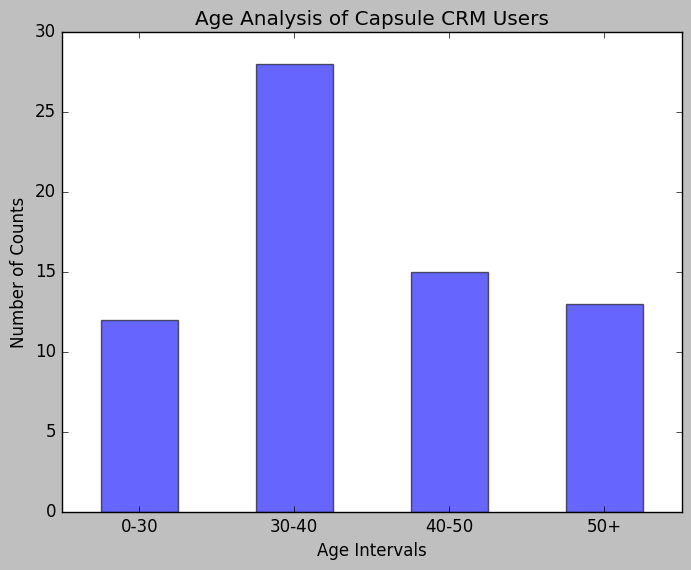

In [50]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
labels = ages_labels
y_pos = np.arange(len(labels))
sizes = ages_size
 
plt.bar(y_pos, sizes, align='center', alpha=0.6, width=.5)
plt.xticks(y_pos, labels)
plt.ylabel('Number of Counts')
plt.xlabel('Age Intervals')
plt.title('Age Analysis of Capsule CRM Users')

plt.show()

#### City  and Region

List of all different Cities and Regions of Capsule CRM users.

Retrieve profiles of all Users

In [44]:
import requests
import json

insightIP = 'http://178.62.229.16'
insightPort = '8484'
insightVersion = 'v1.0'
insightSetting = insightIP + ':' + insightPort + '/api/' + insightVersion 
api_key = "" #needs to be filled

page = 1
users = []
while(True):
    request = '/omn_crawler/get_om_user_profiles?' + 'page=' + str(page) + '&' + 'api_key=' + api_key
    # send a request
    res = requests.get(insightSetting + request)
    
    if len(res.json()['users']) == 0:
        break
    
    users.extend(res.json()['users'])
    page += 1

List all Cities from profile of Users

In [45]:
all_cities = []

for c in users:
    for index in c['capsule_profile']['fields']:
        if index['definition']['name'] == 'CIty':
            all_cities.append(index['value'])

Categorize all Cities 

In [46]:
from collections import Counter

count_cities = Counter()

for i in all_cities:
    count_cities[i] += 1

Show the number of different Cities and all different Cities with their counts

In [48]:
import pandas as pd
cities_list = pd.DataFrame.from_dict(count_cities, orient='index').reset_index()
cities_list = cities_list.rename(columns={'index': 'Cities', 0:'Count'})
cities_list = cities_list.sort_values('Count', ascending=False).reset_index(drop=True)

print("Total Number of different Cities of Capsule CRM users: " + str(len(set(count_cities))))
cities_list

Total Number of different Cities of Capsule CRM users: 179


,Cities,Count
0,"Liverpool, UK",38
1,"Firenze FI, Italia",21
2,"Bratislava, Slovensko",21
3,"Bilbao, Vizcaya, España",12
4,"London, UK",12
5,"Torino TO, Italia",12
6,"Bratislava, Slovakia",10
7,"Istanbul, Turkey",9
8,"Košice, Slovensko",9
9,"Milano MI, Italia",8


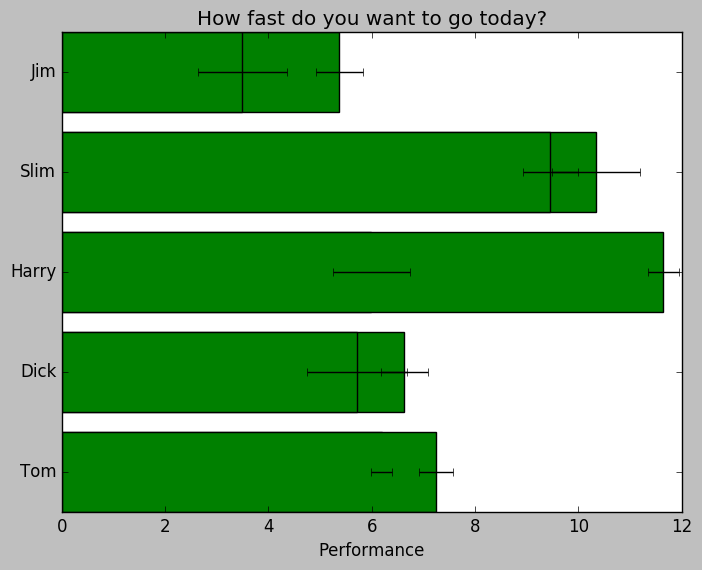

In [70]:
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
plt.yticks(y_pos,people)

plt.xlabel('Performance')
plt.title('How fast do you want to go today?')
plt.show()

In [77]:
labels.reverse()

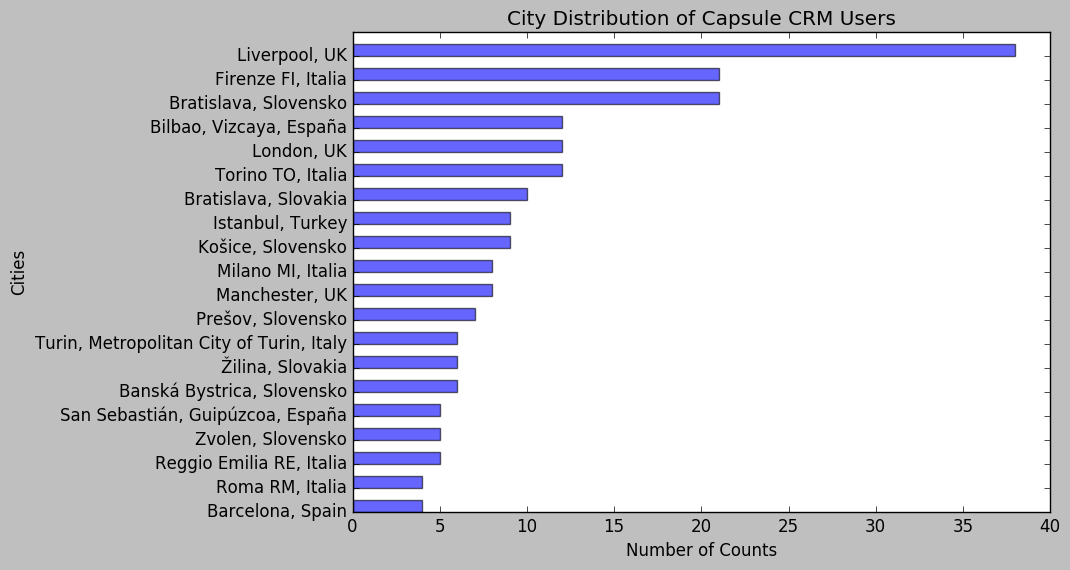

In [90]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
labels = list(cities_list[:20]['Cities'])
y_pos = np.arange(len(list(cities_list[:20]['Cities'])))
sizes = list(cities_list[:20]['Count'])

labels.reverse()
sizes.reverse()

plt.barh(y_pos, sizes, alpha=0.6, height=0.5)
plt.yticks(y_pos, labels)
plt.xlabel('Number of Counts')
plt.ylabel('Cities')
plt.title('City Distribution of Capsule CRM Users')

plt.show()

### Jobs

Lists of all different Jobs of Capsule CRM Users.

Retrieve profiles of all Users

In [26]:
import requests
import json

insightIP = 'http://178.62.229.16'
insightPort = '8484'
insightVersion = 'v1.0'
insightSetting = insightIP + ':' + insightPort + '/api/' + insightVersion 
api_key = "" #needs to be filled

page = 1
users = []
while(True):
    request = '/omn_crawler/get_om_user_profiles?' + 'page=' + str(page) + '&' + 'api_key=' + api_key
    # send a request
    res = requests.get(insightSetting + request)
    
    if len(res.json()['users']) == 0:
        break
    
    users.extend(res.json()['users'])
    page += 1

List all Jobs from profile of Users

In [27]:
all_jobs = []

for j in users:
    if j['capsule_profile'].get('jobTitle') is not None:
        all_jobs.append(j['capsule_profile'].get('jobTitle'))

Categorize all Jobs 

In [28]:
from collections import Counter

count_jobs = Counter()

for i in all_jobs:
    count_jobs[i] += 1

Show the number of different Jobs and all different Jobs with their counts

In [29]:
import pandas as pd
jobs_list = pd.DataFrame.from_dict(count_jobs, orient='index').reset_index()
jobs_list = jobs_list.rename(columns={'index':'Jobs', 0:'Count'})
jobs_list = jobs_list.sort_values('Count', ascending=False).reset_index(drop=True)

print ("Total Number of different Jobs of Capsule CRM users: " + str(len(set(count_cities))) )
jobs_list

Total Number of different Jobs of Capsule CRM users: 179


,Jobs,Count
0,Researcher,16
1,Designer,12
2,CEO,11
3,designer,10
4,Entrepreneur,10
5,Student,7
6,Architect,7
7,Director,7
8,manager,6
9,Consultant,6


In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
labels = list(cities_list[:20]['Cities'])
y_pos = np.arange(len(list(cities_list[:20]['Cities'])))
sizes = list(cities_list[:20]['Count'])

labels.reverse()
sizes.reverse()

plt.barh(y_pos, sizes, alpha=0.6, height=0.5)
plt.yticks(y_pos, labels)
plt.xlabel('Number of Counts')
plt.ylabel('Cities')
plt.title('City Distribution of Capsule CRM Users')

plt.show()

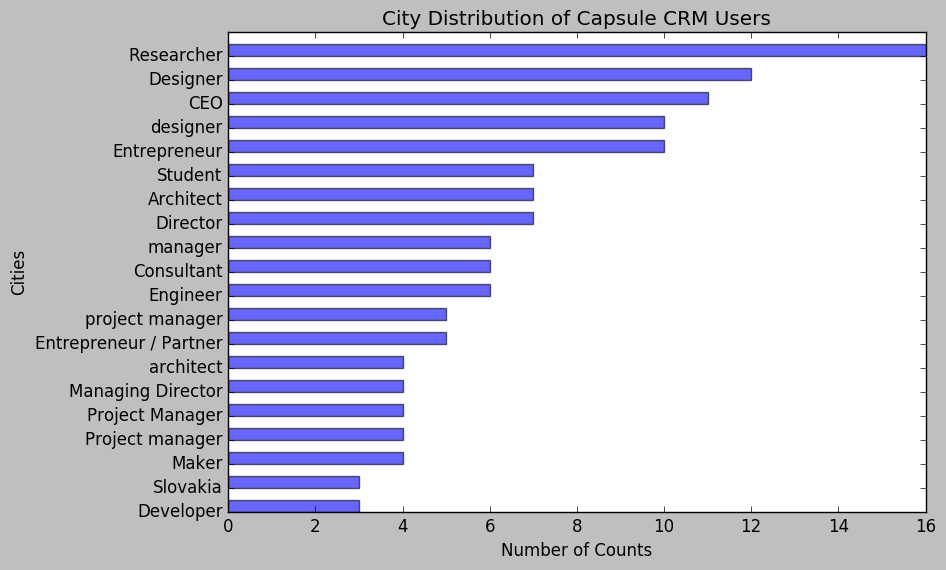

In [92]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
labels = list(jobs_list[:20]['Jobs'])
y_pos = np.arange(len(list(jobs_list[:20]['Jobs'])))
sizes = list(jobs_list[:20]['Count'])
 

labels.reverse()
sizes.reverse()
           
plt.barh(y_pos, sizes, alpha=0.6, height=.5)
plt.yticks(y_pos, labels)
plt.xlabel('Number of Counts')
plt.ylabel('Cities')
plt.title('City Distribution of Capsule CRM Users')

plt.show()

### Twitter Network Graph Based on Follow Relationship

In [ ]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
%matplotlib inline

insightIP = 'http://178.62.229.16'
insightPort = '8484'
insightVersion = 'v1.0'

insightSetting = insightIP + ':' + insightPort + '/api/' + insightVersion 
api_key = "" #needs to be filled

In [ ]:
om_users = []

request = '/omn_crawler/get_om_user_profiles?page='

page = 1
while(True):
    res = requests.get(insightSetting + request + str(page) + '&' + 'api_key=' + api_key)
    if len(res.json()['users']) == 0:
        break
    om_users.extend(res.json()['users'])
    #print(om_users)
    page += 1
    
twitter_users = [omu['twitter_profile']  for omu in om_users if 'twitter_profile' in omu]
crm_users = [omu['capsule_profile']  for omu in om_users if 'capsule_profile' in omu]

Below cell took lots of time to gather all the follow relationship, so run on your own risk :)

In [ ]:
twitter_follower_ids = []
to_date = "2018-02-05"
request = '/omn_crawler/twitter/get_followers?to_date=' + to_date + '&'


for tu in twitter_users:
    for cu in crm_users:
        #print(tu['screen_name'])
        page = 1
        follower_ids = []
        while(True):
            res = requests.get(insightSetting + request + 'crm_ids=[' + str(cu['id']) + ']&page=' + str(page) + '&' + 'api_key=' + api_key)
            if len(res.json()['users'][0]['follower_ids']) == 0:
                break
            fids = [fid['follower_id'] for fid in res.json()['users'][0]['follower_ids']]
            follower_ids.extend(fids)
            page += 1
        twitter_follower_ids.append({"user_id": tu['id_str'],  "screen_name": tu['screen_name'], "follower_ids": follower_ids})

In [106]:
df_twitter_follower_ids = pd.DataFrame.from_dict(twitter_follower_ids, orient='columns', dtype=None)
twitter_ids = list(df_twitter_follower_ids["user_id"])
twitter_snames = list(df_twitter_follower_ids["screen_name"])
follower_ids = list(df_twitter_follower_ids["follower_ids"])

In [107]:
df_twitter_follower_ids

,follower_ids,screen_name,user_id
0,"[4068394035, 14349894, 923614700449001472, 784...",dariomarmo_lama,818381158715113472
1,"[939916173520637953, 4665031881, 9467034491435...",UniBogazici,323040062
2,[],akbayraksemih,455237513
3,"[216668381, 5794752, 168266787, 3307185399, 80...",arman_boyaci,289364321
4,"[2398323684, 488248432, 131713514, 288980795, ...",TheOpenShoes,2185231146
5,"[169448030, 949996710218125312, 1574976486, 23...",Bihurgunea,10475742
6,"[423842030, 2376426411, 149048016, 94385241585...",IBatuz,118033273
7,"[573001434, 155480279, 72246714, 95728828, 936...",sharebot3dstore,3986668937
8,"[158039222, 854441594384261120, 2722008668, 58...",andrecatta,182114889
9,"[196056785, 1488363122, 71074539, 38629459, 95...",AitorSSM,74763818


In [109]:
# how many user is following each user in the openmaker follower network
# this is for graph node size and edges

# userPops[i] = K ==> the i-th user is followed by K users
userPops = [0]*len(follower_ids)

# userNet[i][j] = 1 ==> i follows j
userNet = [[0 for x in range(len(follower_ids))] for y in range(len(follower_ids))]

for i, flw in enumerate(follower_ids):
    for j, u in enumerate(twitter_ids):
        if int(u) in flw:
            userNet[i][j] = 1
            userPops[j] += 1

In [110]:
G = nx.DiGraph()

nodecolors = []
nodetopics = []
nodeSizes = []
            
for i in range(len(follower_ids)):
    for j in range(len(follower_ids)):
        if userNet[i][j] == 1:
            G.add_edge(i,j, weight=0.3)

for i in range(len(follower_ids)):
    nodeSizes.append(1500+100*userPops[i])

for i in range(len(follower_ids)):
    G.add_node(i)

edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

#plt.figure(1, figsize=(20,30))
#nx.draw(G, edges=edges, width=weights, with_labels=True, node_size = nodeSizes, font_weight='bold')
#plt.show()

In [ ]:
filename = 'nodes.csv'
f = open(filename, 'w', encoding='utf-8')

f.write("id,sname")
f.write('\n')
for i, n in enumerate(G.nodes()):
    f.write(str(n) + ',' + twitter_snames[n])
    f.write('\n')
f.close()

filename = 'edges.csv'
f = open(filename, 'w', encoding='utf-8')

f.write("Source,Target")
f.write('\n')
for u,v in G.edges():
    f.write(str(u) + ',' + str(v))
    f.write('\n')
f.close()

<img src="./twitter_follower_network.svg">

### Display List view of current users

Displays Twitter and Capsule CRM profiles. Sorting and filtering can be applied.
http://138.68.92.181:8888/notebooks/InSight/OM%20Network%20Crawler%20Interaction.ipynb#All-OM-User-Profiles

In [83]:
import requests
import json

insightIP = 'http://178.62.229.16'
insightPort = '8484'
insightVersion = 'v1.0'
api_key = "" #needs to be filled

# parameters of get_om_user_profiles are page, sort, descending, filters
page = 1
sorting = "t_followers"
descending = "True" 
filters = {'min_followers':8000,'max_followers':50000}

insightSetting = insightIP + ':' + insightPort + '/api/' + insightVersion 
request = '/omn_crawler/get_om_user_profiles?' + 'page=' + str(page) + '&' + 'sort=' + sorting + '&' + 'descending=' + descending + '&' + 'filters=' + str(filters) + '&' + 'api_key=' + api_key  

# send a request
res = requests.get(insightSetting + request)

In [84]:
from IPython.display import Image, display

def show_user_profile(user_data):
    info = ["profile_image_url", "name", "screen_name", "location", "created_at", "lang", "protected", "description", "time_zone", "followers_count"]
    for i in info:
        if i == "profile_image_url":
            display(Image(user_data[i]))
        else:
            print( i , ":" ,  user_data[i])

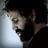

name : David Cuartielles
screen_name : dcuartielles
location : Sweden
created_at : Sun Nov 22 12:35:20 +0000 2009
lang : es
protected : False
description : Co-founder of the Arduino platform: http://t.co/Ne4ecYSU, Teacher at Malmo University: http://t.co/FVlyLcAo
time_zone : Mountain Time (US & Canada)
followers_count : 16023




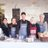

name : Homebaked
screen_name : HomebakedA
location : Oakfield Road, Liverpool
created_at : Wed Jul 18 15:56:39 +0000 2012
lang : en
protected : False
description : A Community-Owned Bakery and Community Land Trust, in the shadow of Liverpool Football Club.
time_zone : Amsterdam
followers_count : 8869




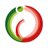

name : ItaliaCamp
screen_name : ItaliaCamp
location : Italy
created_at : Tue Jun 15 00:08:00 +0000 2010
lang : it
protected : False
description : Creiamo connessioni e sviluppiamo processi di innovazione sociale: #ènelnostrointeresse
time_zone : Rome
followers_count : 8075




In [85]:
# show the response in JSON format
for user in res.json()['users']:
    show_user_profile(user['twitter_profile'])
    print()
    print()

## Profile Specific Analytics

Ones a particular user is selected by the front end, we return and display information about the specific user.

This service supports the followings

* CRM data information
  * http://138.68.92.181:8888/notebooks/InSight/OM%20Network%20Crawler%20Interaction.ipynb#Selected-OM-User-Profiles
* OM Spirometer
  * http://138.68.92.181:8888/notebooks/InSight/OM%20Spirometer.ipynb
* OM Personalized Recommendation
  * http://138.68.92.181:8888/notebooks/InSight/OM%20Personalized%20Recommendation.ipynb
* Answers
* Feedbacks

You can find detailed information from the specified Jupyter Notebooks.

#### Twitter Profile Summary

Get profile of a Twitter User

In [86]:
import requests
import json

insightIP = 'http://178.62.229.16'
insightPort = '8484'
insightVersion = 'v1.0'
insightSetting = insightIP + ':' + insightPort + '/api/' + insightVersion 
api_key = "" #needs to be filled

crm_ids = [135377966]

# send a request for a selected Twitter User
request = '/omn_crawler/get_om_user_profiles?' + 'crm_ids=' + str(crm_ids) + '&' + 'api_key=' + api_key

res = requests.get(insightSetting + request)
twitter_profile = res.json()['users'][0]['twitter_profile']

Show some information of a requested Twitter user's profile 

In [87]:
from IPython.display import Image, display

def show_user_profile(user_data):
    info = ["profile_image_url", "name", "screen_name", "location", "created_at", "lang", "protected", "description", "time_zone", "followers_count"]
    for i in info:
        if i == "profile_image_url":
            display(Image(user_data[i]))
        else:
            print( i , ":" ,  user_data[i])

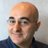

name : taylan
screen_name : AliTaylanCemgil
location : Istanbul
created_at : Wed Jan 11 21:29:16 +0000 2012
lang : en
protected : False
description : 
time_zone : Istanbul
followers_count : 866


In [89]:
show_user_profile(twitter_profile)

### Twitter Follower Change in Time

In [90]:
import requests
import json
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.tools as tls
%matplotlib inline
init_notebook_mode(connected=True)


insightIP = 'http://178.62.229.16'
insightPort = '8484'
insightVersion = 'v1.0'

insightSetting = insightIP + ':' + insightPort + '/api/' + insightVersion + '&' + 'api_key=' + api_key
api_key = "" #needs to be filled

# parameters of get_follower_changes
# twitter_id -> 461494325 -> @AliTaylanCemgil
crm_ids = [156612789]


request = '/omp_analytics/twitter/get_follower_changes?' + 'crm_ids=' + str(crm_ids) 

# send a request
res = requests.get(insightSetting + request)

In [91]:
twitter_id = res.json()['users'][0]["twitter_id"]
crm_id = res.json()['users'][0]["crm_id"]
follower_counts = res.json()['users'][0]["follower_counts"]
follower_dates = res.json()['users'][0]["follower_dates"]

follower_dates = [fcd[5:] for fcd in follower_dates]

font1 = {'size'   : 20}
font2 = {'size'   : 17}
plt.switch_backend('agg')
mpl_fig = plt.figure(figsize=(10,8))
plt.title("Change of Followers", **font1)
plt.plot( range(len(follower_counts)), follower_counts)
plt.plot( range(len(follower_counts)), follower_counts, 'o', label="Followers")
plt.xlim(0, len(follower_counts)-1)
#plt.ylim(0, max(follower_counts)+10)
plt.xlabel("Dates", **font2)
plt.ylabel("Followers Count", **font2)

plotly_fig = tls.mpl_to_plotly( mpl_fig )



plotly_fig['layout']['xaxis1'].update({'ticktext': follower_dates,
                                       'tickvals': list(range(len(follower_counts))),
                                       'tickfont': {'size': 14, 'family':'Courier New, monospace'},
                                       'tickangle': 60
                                       })

iplot(plotly_fig)

### Twitter Mention List

In [42]:
import requests
import json
import operator
import pandas as pd


insightIP = 'http://178.62.229.16'
insightPort = '8484'
insightVersion = 'v1.0'

insightSetting = insightIP + ':' + insightPort + '/api/' + insightVersion 
api_key = "" #needs to be filled

# parameters of get_follower_changes
crm_ids = [156612789]


request = '/omn_crawler/twitter/get_mentions?' + 'crm_ids=' + str(crm_ids) + '&' + 'api_key=' + api_key

# send a request
res = requests.get(insightSetting + request)

In [43]:
mentioned_to = res.json()['users'][0]['mentioned_to']
mentioned_to.sort(key=operator.itemgetter('count'), reverse=True)
df_mentioned_to = pd.DataFrame.from_dict(mentioned_to)

In [44]:
df_mentioned_to

,count,twitter_id
0,97,166477660
1,84,505670972
2,43,50354388
3,27,15145579
4,27,159801019
5,22,579299426
6,19,483121138
7,15,33456450
8,13,323040062
9,13,191463878


##### Top 3 most mentioned users from OM Network

Get all OM twitter user ids

In [45]:
om_user_twitter_ids = []

page = 1
while(True):
    request = '/omn_crawler/get_om_user_profiles?page='+str(page) + '&' + 'api_key=' + api_key
    res = requests.get(insightSetting + request)
    if len(res.json()['users']) == 0:
        break
    for u in res.json()['users']:
        try:
            om_user_twitter_ids.append(u['twitter_profile']['id_str'])
        except:
            pass
    page += 1

In [46]:
from IPython.display import Image, display

def show_user_profile(user_data):
    info = ["profile_image_url", "name", "screen_name"]
    for i in info:
        if i == "profile_image_url":
            display(Image(user_data[i]))
        else:
            print( i , ":" ,  user_data[i])

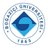

name : Boğaziçi Üni.
screen_name : UniBogazici
Mention Count : 13



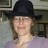

name : S. Uskudarli
screen_name : uskudarli
Mention Count : 3



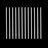

name : Bogdan Ceobanu
screen_name : studios
Mention Count : 1



In [47]:
ctr = 0
for i, mt in df_mentioned_to.iterrows():
    if mt['twitter_id'] != str(twitter_ids[0]) and mt['twitter_id'] in om_user_twitter_ids:
        request = '/omn_crawler/get_om_user_profiles?twitter_ids=[' + str(mt['twitter_id']) + ']' + '&' + 'api_key=' + api_key
        res = requests.get(insightSetting + request)
        show_user_profile(res.json()['users'][0]['twitter_profile'])
        print("Mention Count : " + str(mt['count']))
        print()
        ctr += 1
        if ctr == 3:
            break

### Recommendation

**Summary of an Event**

List all events for a selected Twitter user

In [93]:
import requests
import json

insightIP = 'http://178.62.229.16'
insightPort = '8484'
insightVersion = 'v1.0'
insightSetting = insightIP + ':' + insightPort + '/api/' + insightVersion 
api_key = "" #needs to be filled

users = []
crm_ids = [135574293]

# send a request for a selected Twitter User
request = '/recommendation/events?' + 'crm_ids=' + str(crm_ids) + '&' + 'api_key=' + api_key
res = requests.get(insightSetting + request)

users.extend(res.json()['users'])

In [94]:
event_summary = users[0]['events'][0]

Show a summary of the recommended event for a requested Twitter user

In [96]:
def show_event_summary(user_data):
    info = ["name", "id", "start_time", "end_time", "link", "place"]
    for i in info:
        print (i , ":" ,  user_data[i])

In [97]:
show_event_summary(event_summary)

name : Navigating Real Estate Disruption | Executive Program
id : 38521660323
start_time : 2018-02-26
end_time : 1520031600.0
link : https://www.eventbrite.com/e/navigating-real-estate-disruption-executive-program-tickets-38521660323?aff=ebapi
place : San Mateo, US


**Summary of an Article**

List all articles for a selected Twitter user

In [98]:
import requests
import json

insightIP = 'http://178.62.229.16'
insightPort = '8484'
insightVersion = 'v1.0'
insightSetting = insightIP + ':' + insightPort + '/api/' + insightVersion 
api_key = "" #needs to be filled

users = []
crm_ids = [135574293]

# send a request for a selected Twitter User
request = '/recommendation/news?'+ 'crm_ids=' + str(crm_ids) + '&' + 'api_key=' + api_key
res = requests.get(insightSetting + request)

users.extend(res.json()['users'])

Show a summary of the recommended article for a requested Twitter user

In [99]:
def show_article_summary(user_data):
    info = ["summary", "source", "published_at", "url", "keywords", "popularity", "full_text"]
    for i in info:
        if i == "keywords":
            print (i , ":" ,  [a.encode('ascii','ignore') for a in user_data['keywords']], "\n")
        else:
            print (i , ":" ,  user_data[i], "\n")

In [100]:
article_summary = users[0]['news'][5]
show_article_summary(article_summary)

summary : [Bryan]’s family feeds their dog Chloe once a day, in the mornings.
[Bryan]’s dog-fed detector uses a reed switch and an Arduino clone to detect when the lid is opened.
When the reed switch goes, low, the Arduino lights up an LED.
The light stays on for two hours and then shuts off automatically to get ready for the next day.
Since Chloe devours a bowl of food in about two minutes flat, maybe the next project for [Bryan]’s family could teach her to slow down a bit. 

source : hackaday.com 

published_at : 27-02-2018 

url : https://hackaday.com/2018/02/27/definitive-dog-feeding-with-arduino/ 

keywords : [b'reed', b'chloe', b'family', b'day', b'young', b'food', b'dog', b'feeding', b'bryans', b'definitive', b'arduino', b'switch', b'wastebasket'] 

popularity : 27 

full_text : Some dogs have no sense of self-preservation. Given the opportunity, they will eat until they’re sick. It’s up to us humans to both feed them and remember doing it so they aren’t accidentally overfed. In